In [18]:
import os 
import sys 
import pathlib 
path = pathlib.Path(os.getcwd())
module_path = str(path.parent) + '/'
sys.path.append(module_path)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pymdp import utils


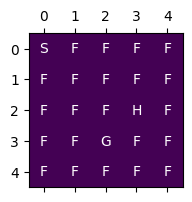

In [20]:
import math

"""Automated context switching"""

map_context_1 = [
    'SFFFF',
    'FFFFF',
    'FFFHF',
    'FFGFF',
    'FFFFF']

map_context_2 = [
    'SFFFF',
    'FFFFF',
    'FFFGF',
    'FFHFF',
    'FFFFF']

map_context_1 = np.array([list(row) for row in map_context_1])

map_context_2 = np.array([list(row) for row in map_context_2])
grid_width = 5
grid_height = 5

def plot_grid(grid_width, grid_height, position = 0):

    grid = np.zeros((grid_width, grid_height))

    # grid[1,2] = 1
    # grid[2,1] = -1
    def set_grid(loc, val):
        grid[math.floor(loc / 5), math.floor(loc % 5)] += val
    
    for loc in range(25):
        set_grid(loc, 2)   
    

    # Plotting the array with each grid labeled with integers, indexed at 0 (without the colorbar)
    fig, ax = plt.subplots(figsize = (2,2))
    cax = ax.matshow(grid, cmap='viridis')

    # Labeling each cell with the corresponding integer, adjusted for zero-indexing
    for (i, j), val in np.ndenumerate(map_context_1):
        ax.text(j, i, str(val ), ha='center', va='center', color='white')
    plt.show()

plot_grid(grid_width, grid_height)

In [21]:
""" Create variables for the storing the dimensionalities of the hidden states and the observations """
import itertools

#HIDDEN STATES
""" Create  the grid locations in the form of a list of (Y, X) tuples -- HINT: use itertools """
grid_location_states = list(itertools.product(range(grid_width), range(grid_height))) #hidden state
context_names = ['Goal-18', 'Goal-14'] #context 0 and context 1

print(f"grid_location_states: {grid_location_states}")
print(f" Length of grid_location_states: {len(grid_location_states)}")

""" Define `num_states` and `num_factors` below """
num_states = [len(grid_location_states), len(context_names)] #[25,2]
num_state_factors = len(num_states) #2 hidden state factors

location_action_names = ["UP", "RIGHT", "DOWN", "LEFT"] #, "STAY"]

context_action_names = ["Do-nothing"]
""" Define `num_controls` below """
num_controls = [len(location_action_names), len(context_action_names)] #num of actions

#OBSERVATIONS
grid_location_obs = list(itertools.product(range(grid_width), range(grid_height)))
score_obs = ["positive", "negative", "neutral"]

""" Define `num_obs` and `num_modalities` below """
num_obs = [len(grid_location_obs), len(score_obs)] # [25, 3]
num_modalities = len(num_obs) #2 observation modalities

grid_location_states: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]
 Length of grid_location_states: 25


In [24]:
""" Generate the A array """
A = utils.obj_array( num_modalities )

def get_neighbors(i):
    ns = []
    if i >5:
        ns.append(i-5)
    if i < 20:
        ns.append(i+5)
    if i % 5 != 0:
        ns.append(i-1)
    if (i+1)% 5 != 0:
        ns.append(i+1)
    return ns
    
A_location = np.zeros((len(grid_location_obs), len(grid_location_states), len(context_names))) #[observation modality, SF1, SF2]

for i in range(len(context_names)):
    A_location[:,:,i] = np.zeros((len(grid_location_obs), len(grid_location_states)))
    for j in range(len(grid_location_obs)):
        ns = get_neighbors(j)
        A_location[j,j,i] = 1.0 - len(ns) * .01
        for n in ns:
            A_location[j,n,i] = .01

A[0] = A_location


A_score = np.zeros((len(score_obs), len(grid_location_states), len(context_names))) #[observation modality, SF1, SF2]

#for first context (Pos, Neg, Neutral)
A_score[:,:,0] = np.array([[0,0,1]] * 25).T #
A_score[:,17,0] = [1,0,0]
A_score[:,14,0] = [0,1,0]

#for second context
A_score[:,:,1] = np.array([[0,0,1]] * 25).T
A_score[:,14,1] = [1,0,0]
A_score[:,17,1] = [0,1,0]

A[1] = A_score

A_location

array([[[0.98, 0.98],
        [0.01, 0.01],
        [0.  , 0.  ],
        ...,
        [0.  , 0.  ],
        [0.  , 0.  ],
        [0.  , 0.  ]],

       [[0.01, 0.01],
        [0.97, 0.97],
        [0.01, 0.01],
        ...,
        [0.  , 0.  ],
        [0.  , 0.  ],
        [0.  , 0.  ]],

       [[0.  , 0.  ],
        [0.01, 0.01],
        [0.97, 0.97],
        ...,
        [0.  , 0.  ],
        [0.  , 0.  ],
        [0.  , 0.  ]],

       ...,

       [[0.  , 0.  ],
        [0.  , 0.  ],
        [0.  , 0.  ],
        ...,
        [0.97, 0.97],
        [0.01, 0.01],
        [0.  , 0.  ]],

       [[0.  , 0.  ],
        [0.  , 0.  ],
        [0.  , 0.  ],
        ...,
        [0.01, 0.01],
        [0.97, 0.97],
        [0.01, 0.01]],

       [[0.  , 0.  ],
        [0.  , 0.  ],
        [0.  , 0.  ],
        ...,
        [0.  , 0.  ],
        [0.01, 0.01],
        [0.98, 0.98]]])

In [25]:
#Do we need to hardcode absorbing latent states in G and H?

#location_action_names = [ "UP", "DOWN", "LEFT", "RIGHT"] #actions we can take

#Initialize overall B

B = utils.obj_array(len(num_states))

#B[0]: State Factor 1: Location
#9x9x4: [len(location), len(location), len(actions)]
#depends on movement

B_grid_movement = np.zeros((len(grid_location_states), len(grid_location_states), len(location_action_names))) #[observation modality, SF1, SF2]
for i in range(25):
    B_grid_movement[:,i,0] = np.zeros(25)
    B_grid_movement[:,i,1] = np.zeros(25)
    B_grid_movement[:,i,2] = np.zeros(25)
    B_grid_movement[:,i,3] = np.zeros(25)
    for j in range(25):
        up_new_position = i - 5 if i > 5 else i
        B_grid_movement[up_new_position,i,0] = 1
        down_new_position = i + 5 if i < 20 else i
        B_grid_movement[down_new_position,i,2] = 1
        left_new_position = i if (i) % 5 == 0 else i - 1
        B_grid_movement[left_new_position,i,2] = 1
        right_new_position = i if (i + 1) % 5 == 0 else i + 1
        B_grid_movement[right_new_position,i,1] = 1

B[0] = B_grid_movement

B_context = np.zeros((len(context_names), len(context_names), len(context_action_names)))

B_context[:,:,0] = np.eye(len(context_names))

B[1] = B_context


In [27]:
#Overall C
C = utils.obj_array( num_modalities )

#Preference over Observation Modality 1: Grid Locations [-4, 0, ... 0]
C_location = np.zeros(25)
C_location[0] = -4 #we prefer to not stay in the starting location
C[0] = C_location

#Preference over Observation Modality 2: Scores [-4, 4, 0]
C[1] = np.array([4, -4, 0]) #we prefer the goal state, we negatively prefer the hole state, and are neutral else

In [28]:
#Overall D
D = utils.obj_array( num_state_factors )

#Prior over State Factor 1: Grid Locations: [1,0,0,0,0,0,0,0,0]
D_location = np.zeros(25)
D_location[0] = 1 # we have prior knowledge that our starting location is in position 1
D[0] = D_location

#Prior over State Factor 2: Context: Uniform [.5 .5]
D[1] = np.array([.5, .5])

In [8]:
num_modalities

2

In [9]:
num_states

[25, 2]

In [29]:
zeta_modalities_and_states = utils.obj_array(num_modalities)
zeta_modalities_and_states[0] = np.random.uniform(0,1,size = (num_states[0], num_states[1]))
zeta_modalities_and_states[1] = np.random.uniform(0,1,size = (num_states[0], num_states[1]))

In [11]:
B[0].shape[1:]


(25, 4)

In [30]:
omega_modalities_and_states = utils.obj_array(2)
omega_modalities_and_states[0] = np.random.uniform(0,1,size = B[0].shape[1:])
omega_modalities_and_states[1] = np.random.uniform(0,1,size = B[1].shape[1:])

In [31]:
from pymdp import agent
policy_len = 6
agent_zeta_omega = agent.Agent(A = A, B = B, C = C, D = D, policy_len = policy_len, beta_omega_prior = omega_modalities_and_states, beta_zeta_prior = zeta_modalities_and_states) #policy length = number of actions in policies

In [32]:
#Auxiliary function that takes in agent and outputs score ... Environment step function will have two step
def score_from_location(location):
  if location == 7:
    score = 0

  elif location == 5:
    score = 1

  else:
    score = 2

  return score

TIMESTEP: 0
next_action: LEFT
location_observation: 0
score_observation: 2


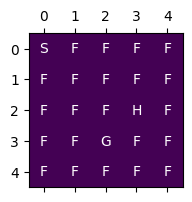

TIMESTEP: 1
next_action: LEFT
location_observation: 0
score_observation: 2


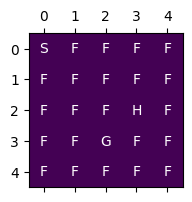

TIMESTEP: 2
next_action: LEFT
location_observation: 0
score_observation: 2


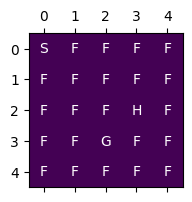

TIMESTEP: 3
next_action: LEFT
location_observation: 0
score_observation: 2


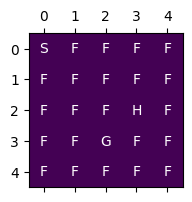

TIMESTEP: 4
next_action: LEFT
location_observation: 0
score_observation: 2


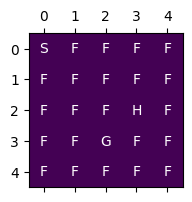

TIMESTEP: 5
next_action: LEFT
location_observation: 0
score_observation: 2


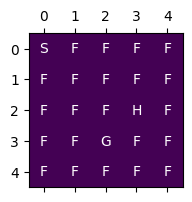

TIMESTEP: 6
next_action: LEFT
location_observation: 0
score_observation: 2


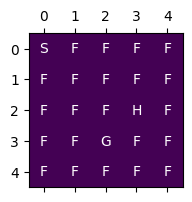

TIMESTEP: 7


KeyboardInterrupt: 

In [35]:
#make sure whatever comes out of env is [list of indices] over observations and pass this to agent.infer_states
from pymdp.envs.grid_worlds import GridWorldEnv
from random import random 
import math

env = GridWorldEnv(shape = [3,3], init_state=0)

T = 10

agent = agent_zeta_omega

# agent will have perception that their location is offset slightly
def apply_foggy_location(loc):
    r = random()
    if r < .25: # up
        loc = math.min(0, loc - 5)
    elif r < .5: # down
        loc = math.max(24, loc + 5)
    elif r < .75: # left
        loc = loc - 1 if loc - 1 % 5 != 0 else loc
    else: # right
        loc = loc - 1 if loc % 5 != 0 else loc
    loc

initial_location_observation = 0
initial_score_observation = score_from_location(initial_location_observation)
observation = [0, 2]

for t in range(T):
    print(f"TIMESTEP: {t}")

    qs = agent.infer_states(observation)

    q_pi, G = agent.infer_policies()
    next_action = agent.sample_action()
    next_action = int(next_action[0])
    print(f"next_action: {location_action_names[next_action]}")
    location_observation = env.step(next_action)
    is_slippery = t + 2 % 3 == 0
    if is_slippery:
        # replay the action to slip in the same direction
        location_observation = env.step(next_action)
    is_foggy = t + 1 % 3 == 0
    if is_foggy:
        location_observation = apply_foggy_location(location_observation)
    
    print(f"location_observation: {location_observation}")
    score_observation = score_from_location(location_observation)
    print(f"score_observation: {score_observation}")
    observation = [location_observation, score_observation]

    
    plot_grid(grid_width, grid_height, location_observation)

    if t > 0:

        agent.beta_omega, agent.beta_omega_prior = agent.update_omega()
        # print(f"Omega: {agent.beta_omega}")

        agent.beta_zeta, agent.beta_zeta_prior = agent.update_zeta(observation)
        # print(f"Zeta: {agent.beta_zeta}")
        # agent.gamma = agent.update_gamma()

        # print(f"Gamma: {agent.gamma}")


In [ ]:
agent.G

array([-14.54167755, -13.78274122, -12.9160894 , -13.01164456,
       -19.86410277, -19.87161027, -19.86410317, -22.30062236,
       -14.54474054, -13.78384043, -12.91396635, -13.01130377,
       -22.30062236, -15.8641029 , -15.86444378, -18.30062236,
       -13.9402432 , -12.89944618, -11.78491695, -11.91819675,
       -12.1343841 , -11.63487643, -11.04288785, -11.09132171,
       -11.12206495, -11.01116396,  -9.75338765,  -9.82022391,
       -12.24374166, -11.05744712,  -9.82430681, -10.84920907,
       -11.86409733, -18.30062236, -11.86410071, -14.30062236,
       -10.54472838,  -9.7838378 ,  -8.91398112,  -9.01125266,
       -10.30062236,  -7.8641032 ,  -6.30062237, -10.30062237,
       -11.86410322, -11.86408206, -14.27386339, -11.86409679,
       -14.544781  , -13.78383853, -12.91397433, -13.01131854,
       -14.54472011, -13.78382028, -12.91393343, -13.01128759,
       -15.83979659, -15.83794843, -18.22412062, -15.83549005,
       -14.54376249, -13.78348759, -12.91464046, -13.01

In [ ]:
agent.beta_omega

array([array([[1.04641062, 1.12407966, 1.90722197, 2.87954153],
              [1.98093411, 2.01459376, 0.16364769, 2.73837091],
              [0.01734638, 0.47216457, 2.36763314, 2.71352072],
              [0.25694375, 2.17180763, 1.48722223, 0.8161247 ],
              [1.64744806, 0.69815402, 2.81695809, 0.66661982],
              [2.13072642, 1.59612869, 2.31785594, 0.88172218],
              [2.385512  , 2.52172991, 1.12256972, 1.79496446],
              [0.7107597 , 2.36616359, 0.79545244, 0.22311784],
              [2.61872887, 2.38711898, 0.25501791, 1.0701027 ]]),
       array([[8.28373598e-02],
              [1.12728862e+02]])], dtype=object)

In [ ]:
agent.beta_omega_prior

array([array([[0.34880354, 0.37469322, 0.63574066, 0.95984718],
              [0.66031137, 0.67153125, 0.05454923, 0.9127903 ],
              [0.00578213, 0.15738819, 0.78921105, 0.90450691],
              [0.08564792, 0.72393588, 0.49574074, 0.27204157],
              [0.54914935, 0.23271801, 0.93898603, 0.22220661],
              [0.71024214, 0.5320429 , 0.77261865, 0.29390739],
              [0.79517067, 0.84057664, 0.37418991, 0.59832149],
              [0.2369199 , 0.7887212 , 0.26515081, 0.07437261],
              [0.87290962, 0.79570633, 0.08500597, 0.3567009 ]]),
       array([[0.02761245],
              [0.734926  ]])], dtype=object)

In [ ]:
agent.beta_omega_prior[0]

array([[0.34880354, 0.37469322, 0.63574066, 0.95984718],
       [0.66031137, 0.67153125, 0.05454923, 0.9127903 ],
       [0.00578213, 0.15738819, 0.78921105, 0.90450691],
       [0.08564792, 0.72393588, 0.49574074, 0.27204157],
       [0.54914935, 0.23271801, 0.93898603, 0.22220661],
       [0.71024214, 0.5320429 , 0.77261865, 0.29390739],
       [0.79517067, 0.84057664, 0.37418991, 0.59832149],
       [0.2369199 , 0.7887212 , 0.26515081, 0.07437261],
       [0.87290962, 0.79570633, 0.08500597, 0.3567009 ]])

In [ ]:
agent.q_pi

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])